In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})

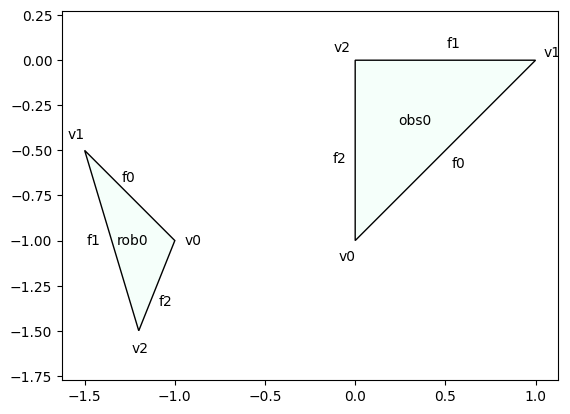

In [2]:
# 2 items
obs_vertices = [np.array([[0, 0], [1, 0], [0, -1]])]
obj_vertices = []
rob_vertices = [np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])]
source_obj_pos = []
source_rob_pos = [[-1, -1]]
target_obj_pos = []
target_rob_pos = [[-1, -0.5]]


# # 2 movable items
# obs_vertices = []
# obj_vertices = [np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])]
# rob_vertices = [np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])]
# source_obj_pos = [[1, 1]]
# source_rob_pos = [[-1, -1]]
# target_obj_pos = [[-1, -1]]
# target_rob_pos = [[1, 1]]

# 3 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 3 boxes
# obs_vertices = [
#     np.array([[0, 0], [2, 0], [2, 1], [0,1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[0, 0], [0.5, 0], [0.5, 0.5], [0,0.5]]) + np.array([0,-1])
# ]

# # 4 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
obs = []
objs = []
robs = []
n_pos_per_set = 2
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
all_rigid_bodies = obs + objs + robs

for rigid_body in all_rigid_bodies:
    rigid_body.plot()

In [3]:
contact_graph = ContactGraph(
    obs, objs, robs, source_obj_pos, source_rob_pos, target_obj_pos, target_rob_pos
)

print(contact_graph.params)

vars_pos shape (1, 2, 2)
[[[Variable('rob0_pos(0, 0)', Continuous)
   Variable('rob0_pos(0, 1)', Continuous)]
  [Variable('rob0_pos(1, 0)', Continuous)
   Variable('rob0_pos(1, 1)', Continuous)]]]
vars_all shape (4,)
[Variable('rob0_pos(0, 0)', Continuous)
 Variable('rob0_pos(0, 1)', Continuous)
 Variable('rob0_pos(1, 0)', Continuous)
 Variable('rob0_pos(1, 1)', Continuous)]
Generating contact sets for 2 bodies...
Generating contact pair modes for 1 body pairs...


100%|██████████| 1/1 [00:00<00:00, 78.93it/s]


Each body pair has on average 9.0 modes
Generating contact sets for 9 sets...


100%|██████████| 9/9 [00:00<00:00, 4931.25it/s]


Pruning empty sets...


100%|██████████| 9/9 [00:00<00:00, 36.86it/s]

9 sets remain after removing 0 empty sets
self.uv_vars_all: [Variable('u_rob0_pos(0, 0)', Continuous)
 Variable('u_rob0_pos(0, 1)', Continuous)
 Variable('u_rob0_pos(1, 0)', Continuous)
 Variable('u_rob0_pos(1, 1)', Continuous)
 Variable('v_rob0_pos(0, 0)', Continuous)
 Variable('v_rob0_pos(0, 1)', Continuous)
 Variable('v_rob0_pos(1, 0)', Continuous)
 Variable('v_rob0_pos(1, 1)', Continuous)]
vertex_cost_position_path_length A: [[-1.  1.  0.  0.]
 [ 0.  0. -1.  1.]]
Affine A: [[ 0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.  0.]]
b: [0. 0.]
Generating edges...(parallel)



100%|██████████| 55/55 [00:00<00:00, 294.09it/s]


16 edges generated
GraphParams(dim=4, n_vertices=11, n_edges=16, source=[[-1, -1]], target=[[-1, -0.5]], workspace=None, default_costs_constraints=DefaultGraphCostsConstraints(vertex_costs=[<pydrake.solvers.L2NormCost object at 0x7f63a0f9bb70>], vertex_constraints=[], edge_costs=[<pydrake.solvers.LinearCost object at 0x7f63a0f9b4b0>], edge_constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x7f63a0f9bf70>]))


In [4]:
sol = contact_graph.solve()
vertex_names, ambient_path = zip(*sol.path)
print(vertex_names)

Post solve hook called...
('s', "('NC:obs0_f2-rob0_v0',)", 't')


In [5]:
# contact_graph.vertices["('NC:obs0_f2-rob0_v0',)"].gcs_vertex.GetSolution(sol.result)
sol.result.GetSolution(contact_graph.vertices["('NC:obs0_f2-rob0_v0',)"].gcs_vertex.x())
# sol.result.GetSolution(contact_graph.vertices["s"].gcs_vertex.x())
# contact_graph.edges[("s","('NC:obs0_f2-rob0_v0',)")].gcs_edge.GetSolutionCost(sol.result)

array([-2.53094126, -2.5309247 , -1.930325  , -1.72843709])

In [6]:
contact_sol = contact_graph.contact_spp_sol

In [7]:
print(sol)

ShortestPathSolution(cost=2.5000000062166974, time=0.016970613971352577, path=[('s', array([-1., -1., -1., -1.])), ("('NC:obs0_f2-rob0_v0',)", array([-2.53094126, -2.5309247 , -1.930325  , -1.72843709])), ('t', array([-1. , -1. , -0.5, -0.5]))], flows=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0], result=<pydrake.solvers.MathematicalProgramResult object at 0x7f63a0f76530>)


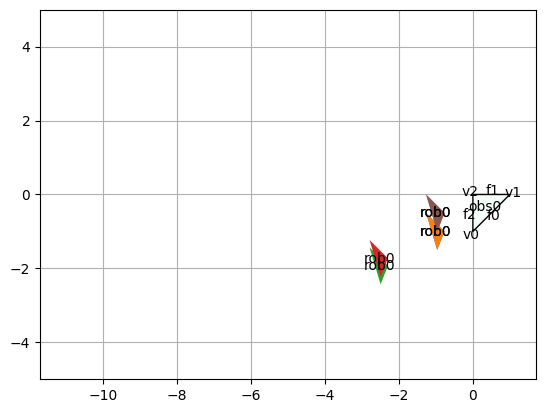

In [8]:
def plot_path(sol):
    n_time_steps = sol.object_pos_trajectories.shape[2]
    plt.figure()
    for j in range(n_time_steps):
        # Plot object trajectories
        for i in range(sol.object_pos_trajectories.shape[0]):
            contact_graph.objects[i].plot_at_position(
                sol.object_pos_trajectories[i, :, j]
            )
        for i in range(sol.robot_pos_trajectories.shape[0]):
            contact_graph.robots[i].plot_at_position(
                sol.robot_pos_trajectories[i, :, j]
            )
    for obs in contact_graph.obstacles:
        obs.plot()
    # Show the plot
    plt.axis("equal")
    plt.xlim(-15, 5)
    plt.ylim(-5, 5)

    plt.grid()
    plt.show()


plot_path(contact_sol)

In [9]:
# contact_graph.plot_path()

In [10]:
for i in range(contact_sol.robot_pos_trajectories.shape[2]):
    if i % n_pos_per_set == 0:
        print("-----")
        print(
            "robot",
            contact_sol.robot_pos_trajectories[0, :, i],
        )
        if contact_sol.object_pos_trajectories.size > 0:
            print(
                "object",
                contact_sol.object_pos_trajectories[0, :, i],
            )

    # print(f"last of set: {contact_sol.object_pos_trajectories[0, :, (i*n_pos_per_set)-1]}")
    # print(f"first of set: {contact_sol.object_pos_trajectories[0, :, i*n_pos_per_set]}")

-----
robot [-1. -1.]
-----
robot [-2.53094126 -1.930325  ]
-----
robot [-1.  -0.5]


In [11]:
vertex_names, ambient_path = zip(*sol.path)
print(vertex_names)

print(ambient_path)
new_ambient_path = np.array(
    [
        [1.000, 1.000, 1.000, 1.000, -1.000, -1.000, -1.000, -1.000],
        [1.000, -0.325, 1.000, 2.487, -1.000, -0.240, -1.000, -0.288],
        [-0.325, -1.000, 2.487, -1.000, -0.240, 1.000, -0.288, 1.000],
        [-1.000, -1.000, -1.000, -1.000, 1.000, 1.000, 1.000, 1.000],
    ]
)
ambient_path = np.array(ambient_path)
# ambient_path = new_ambient_path

('s', "('NC:obs0_f2-rob0_v0',)", 't')
(array([-1., -1., -1., -1.]), array([-2.53094126, -2.5309247 , -1.930325  , -1.72843709]), array([-1. , -1. , -0.5, -0.5]))


In [12]:
contact_graph.cc_factory.uv_vars_all
for i in range(ambient_path.shape[0] - 1):
    for constraint in contact_graph._default_costs_constraints.edge_constraints:
        uv_vals_flattened = np.concatenate(ambient_path[i : i + 2])
        issatisfied = constraint.CheckSatisfied(uv_vals_flattened)
        print(f"constraint is satisfied: {issatisfied}")
    # print(f"vertex: {vertex_names[i]}")
    # print(f"vertex pos: {ambient_path[i]}")
    # print(f"next vertex: {vertex_names[i+1]}")
    # print(f"next vertex pos: {ambient_path[i+1]}")
    print("-------------------")

constraint is satisfied: False
-------------------
constraint is satisfied: False
-------------------


In [13]:
# for name in contact_graph.vertex_names:
#     print(name)
#     contact_graph.plot_samples_in_set(name, 1)
#     plt.show()

In [14]:
# contact_graph.plot_samples_in_set("('IC:obs0_v0-rob0_f0',)", 1)
# xy=[-0.63333045, -0.59998453]
# sample = np.repeat(xy, n_pos_per_set)
# contact_graph.vertices["('IC:obs0_v0-rob0_f0',)"].convex_set.set.PointInSet(sample)

In [15]:
from large_gcs.graph.graph import Graph

In [16]:
dup_graph = Graph(contact_graph._default_costs_constraints)
dup_graph.add_vertex(contact_graph.vertices["s"], "s")
dup_graph.add_vertex(contact_graph.vertices["t"], "t")
dup_graph.add_vertex(
    contact_graph.vertices["('NC:obs0_f2-rob0_v0',)"], "('NC:obs0_f2-rob0_v0',)"
)
dup_graph.add_edge(contact_graph.edges[("s", "('NC:obs0_f2-rob0_v0',)")])
dup_graph.add_edge(contact_graph.edges[("('NC:obs0_f2-rob0_v0',)", "t")])
dup_graph.set_source("s")
dup_graph.set_target("t")
dup_sol = dup_graph.solve()
print(dup_sol)

ShortestPathSolution(cost=2.5, time=0.0021314079640433192, path=[('s', array([-1., -1., -1., -1.])), ("('NC:obs0_f2-rob0_v0',)", array([-1. , -1. , -1. , -0.5])), ('t', array([-1. , -1. , -0.5, -0.5]))], flows=[1.0, 1.0], result=<pydrake.solvers.MathematicalProgramResult object at 0x7f63e49243b0>)


In [17]:
dup_graph.add_vertex(
    contact_graph.vertices["('NC:obs0_f0-rob0_v1',)"], "('NC:obs0_f0-rob0_v1',)"
)
# dup_graph.add_vertex(contact_graph.vertices["('NC:obs0_f1-rob0_v2',)"], "('NC:obs0_f1-rob0_v2',)")

edges_to_add = [
    # ("('NC:obs0_f0-rob0_v1',)", "('NC:obs0_f1-rob0_v2',)"),
    # ("('NC:obs0_f1-rob0_v2',)", "('NC:obs0_f0-rob0_v1',)"),
    ("('NC:obs0_f0-rob0_v1',)", "('NC:obs0_f2-rob0_v0',)"),
    ("('NC:obs0_f2-rob0_v0',)", "('NC:obs0_f0-rob0_v1',)"),
    # ("('NC:obs0_f1-rob0_v2',)", "('NC:obs0_f2-rob0_v0',)"),
    # ("('NC:obs0_f2-rob0_v0',)", "('NC:obs0_f1-rob0_v2',)")
]
for edge in edges_to_add:
    dup_graph.add_edge(contact_graph.edges[edge])

In [18]:
# Export out these problematic sets
m1_A = np.array2string(
    contact_graph.vertices["('NC:obs0_f2-rob0_v0',)"].convex_set.set.A(), separator=","
)
m1_b = np.array2string(
    contact_graph.vertices["('NC:obs0_f2-rob0_v0',)"].convex_set.set.b(), separator=","
)
m2_A = np.array2string(
    contact_graph.vertices["('NC:obs0_f0-rob0_v1',)"].convex_set.set.A(), separator=","
)
m2_b = np.array2string(
    contact_graph.vertices["('NC:obs0_f0-rob0_v1',)"].convex_set.set.b(), separator=","
)
m3_A = np.array2string(
    contact_graph.vertices["('NC:obs0_f1-rob0_v2',)"].convex_set.set.A(), separator=","
)
m3_b = np.array2string(
    contact_graph.vertices["('NC:obs0_f1-rob0_v2',)"].convex_set.set.b(), separator=","
)
print(f"m1_A = {m1_A}")
print(f"m1_b = {m1_b}")
print(f"m2_A = {m2_A}")
print(f"m2_b = {m2_b}")
print(f"m3_A = {m3_A}")
print(f"m3_b = {m3_b}")

m1_A = [[1.,0.,0.,0.],
 [0.,1.,0.,0.]]
m1_b = [-0.23333045,-0.23333045]
m2_A = [[-0.70710678, 0.        , 0.70710678, 0.        ],
 [ 0.        ,-0.70710678, 0.        , 0.70710678]]
m2_b = [-1.24921309,-1.24921309]
m3_A = [[ 0., 0.,-1., 0.],
 [ 0., 0., 0.,-1.]]
m3_b = [-0.50001547,-0.50001547]


Interesting, the moment I added the edge ("('NC:obs0_f2-rob0_v0',)", "('NC:obs0_f0-rob0_v1',)"), then my solution became wrong... 

In [19]:
dup_sol = dup_graph.solve()
print(dup_sol)

ShortestPathSolution(cost=2.50000000097319, time=0.0020716730505228043, path=[('s', array([-1., -1., -1., -1.])), ("('NC:obs0_f2-rob0_v0',)", array([-1.47986539, -1.47986539, -1.47986539, -0.97986539])), ('t', array([-1. , -1. , -0.5, -0.5]))], flows=[1.0, 1.0, 0.0, 0.0], result=<pydrake.solvers.MathematicalProgramResult object at 0x7f63a2b530b0>)


In [20]:
# contact_graph.obstacles[0].plot()
# contact_graph.robots[0].plot()
# plt.show()

In [21]:
for name, v in contact_graph.vertices.items():
    print(name, sol.result.GetSolution(v.gcs_vertex.x()))
    print([(e.u, e.v) for e in contact_graph.incident_edges(name)])
    print("___")

('IC:obs0_f0-rob0_v1',) [nan nan nan nan]
[("('IC:obs0_f0-rob0_v1',)", "('NC:obs0_f0-rob0_v1',)"), ("('NC:obs0_f0-rob0_v1',)", "('IC:obs0_f0-rob0_v1',)")]
___
('IC:obs0_f1-rob0_v2',) [nan nan nan nan]
[("('IC:obs0_f1-rob0_v2',)", "('NC:obs0_f1-rob0_v2',)"), ("('NC:obs0_f1-rob0_v2',)", "('IC:obs0_f1-rob0_v2',)")]
___
('IC:obs0_f2-rob0_v0',) [nan nan nan nan]
[("('IC:obs0_f2-rob0_v0',)", "('NC:obs0_f2-rob0_v0',)"), ("('NC:obs0_f2-rob0_v0',)", "('IC:obs0_f2-rob0_v0',)")]
___
('IC:obs0_v0-rob0_f0',) [nan nan nan nan]
[]
___
('IC:obs0_v1-rob0_f1',) [nan nan nan nan]
[]
___
('IC:obs0_v2-rob0_f2',) [nan nan nan nan]
[]
___
('NC:obs0_f0-rob0_v1',) [nan nan nan nan]
[("('IC:obs0_f0-rob0_v1',)", "('NC:obs0_f0-rob0_v1',)"), ("('NC:obs0_f0-rob0_v1',)", "('IC:obs0_f0-rob0_v1',)"), ("('NC:obs0_f0-rob0_v1',)", "('NC:obs0_f1-rob0_v2',)"), ("('NC:obs0_f1-rob0_v2',)", "('NC:obs0_f0-rob0_v1',)"), ("('NC:obs0_f0-rob0_v1',)", "('NC:obs0_f2-rob0_v0',)"), ("('NC:obs0_f2-rob0_v0',)", "('NC:obs0_f0-rob0_v1',)"

In [22]:
for name, v in dup_graph.vertices.items():
    print(name, dup_sol.result.GetSolution(v.gcs_vertex.x()))

s [-1. -1. -1. -1.]
t [-1.  -1.  -0.5 -0.5]
('NC:obs0_f2-rob0_v0',) [-1.47986539 -1.47986539 -1.47986539 -0.97986539]
('NC:obs0_f0-rob0_v1',) [nan nan nan nan]


In [23]:
# contact_graph.remove_edge(('t', "('NC:obs0_f1-rob0_v2',)"))
# contact_graph.remove_edge(('t', "('NC:obs0_f2-rob0_v0',)"))
# contact_graph.remove_edge(("('NC:obs0_f2-rob0_v0',)", 's'))

In [24]:
# contact_graph.remove_vertex("('NC:obs0_f1-rob0_v2',)")
# contact_graph.remove_vertex("('NC:obs0_f0-rob0_v1',)")
# new_sol = contact_graph.solve()
# print(new_sol.path)

In [25]:
# original_vertices = contact_graph.vertex_names[:-3]

# for vert in reversed(original_vertices):
#     print(f"removing vertex, {vert}")
#     contact_graph.remove_vertex(vert)
#     new_sol = contact_graph.solve()
#     print(new_sol.path)

In [26]:
# for name in contact_graph.vertex_names:
#     if name != "s" and name != "t" and name !="('NC:obs0_f2-rob0_v0',)":
#         contact_graph.remove_vertex(name)